In [ ]:
from ultralytics import YOLO

# Training

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

In [ ]:
# Display model information (optional)
model.info()

In [ ]:
from ultralytics import settings

# Update a setting
settings.update({"mlflow": True})

# Reset settings to default values
settings.reset()

In [ ]:
export MLFLOW_EXPERIMENT_NAME=object_v3

In [ ]:
#!pip install -U ultralytics

In [ ]:
results = model.train(data=r"items_data\data.yaml", epochs=80, imgsz=640,project='egy_obj_detector2',
                     name="ver1")

In [ ]:
re=model.train(data=r"\items_data\data.yaml", epochs=1, imgsz=640)

# Evalution

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Read and resize the image to 640x640
image_path = r"Pictures\mobadra\IMG_20241101_181012.jpg"
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (640, 640)) 
results = model(resized_image)

# Get image with bounding boxes and labels drawn
annotated_image = results[0].plot()  # This draws boxes and labels on the image

In [ ]:
# Display the image using OpenCV
cv2.imshow("Detected Objects", annotated_image)
cv2.waitKey(0)  # Press any key to close the image window
cv2.destroyAllWindows()

In [ ]:
import cv2

# Input and output video paths
input_path = r"Pictures\mobadra\VID_20241102_162123.mp4"
output_path =r"Pictures\mobadra\Output_resized.mp4"

# Set the desired width and height
width, height = 640, 640

# Open the input video
cap = cv2.VideoCapture(input_path)

# Get the original frame rate
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Resize each frame and save to output
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize frame
    resized_frame = cv2.resize(frame, (width, height))
    
    # Write resized frame to output video
    out.write(resized_frame)

# Release resources
cap.release()
out.release()

print(f"Resized video saved as {output_path}")


In [ ]:
new=r"Pictures\mobadra\Output_resized.mp4"

In [ ]:
res=mk(new,show=True)

In [ ]:

# Load the video file
input_video_path = r"Pictures\mobadra\VID_20241101_173526.mp4"
output_video_path = r"Pictures\mobadra\Output.mp4"

# Open the video using OpenCV
video_capture = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the codec and create VideoWriter object to save output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Iterate over each frame
frame_count = 0
while video_capture.isOpened():
    ret, frame = video_capture.read()  # Read a frame
    if not ret:
        break
    
    # Apply YOLOv8 object detection
    results = model(frame)[0]
    
    # Iterate through the detections and draw bounding boxes
    for result in results.boxes.data.tolist():  # Each detection in the format [x1, y1, x2, y2, conf, class]
        x1, y1, x2, y2, conf, cls = result[:6]
        label = f'{model.names[cls]} {conf:.2f}'
        
        # Draw bounding box and label on the frame
        if conf > 0.5: 
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 4)  # Bounding box
        # cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Write the processed frame to the output video
    out_video.write(frame)
    
    # Print progress
    frame_count += 1
    print(f'Processed frame {frame_count}/{total_frames}')

# Release resources
video_capture.release()
out_video.release()
cv2.destroyAllWindows()

print(f'Output video saved to {output_video_path}')

In [ ]:
cv2.destroyAllWindows()


In [27]:
mk = YOLO(r"egy_obj_detector2\ver1\weights\last.pt")  # load a pretrained model (recommended for training)

In [38]:
# Read and resize the image to 640x640
image_path = r"Pictures\mobadra\IMG_20241101_181012.jpg"
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (640, 640)) 
results = mk.predict(resized_image,conf=0.35)

# Get image with bounding boxes and labels drawn
annotated_image = results[0].plot()  # This draws boxes and labels on the image


0: 640x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 217.2ms
Speed: 3.6ms preprocess, 217.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [39]:
# Display the image using OpenCV
cv2.imshow("Detected Objects", annotated_image)
cv2.waitKey(0)  # Press any key to close the image window
cv2.destroyAllWindows()

In [ ]:
mk.info()

In [ ]:
import torch
import ultralytics

In [ ]:
print("YOLOv8 version:", ultralytics.__version__)
print("PyTorch version:", torch.__version__)

In [ ]:
mt= torch.load(r"egy_obj_detector2\ver1\weights\last.pt")


In [ ]:
mt

In [34]:
# Read and resize the image to 640x640
image_path = r"Pictures\mobadra\IMG_20241101_181012.jpg"
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (640, 640)) 
results = mk.predict(resized_image)

# Get image with bounding boxes and labels drawn
annotated_image = results[0].plot()  # This draws boxes and labels on the image


0: 640x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 3 Obour Land Milks, 223.7ms
Speed: 5.5ms preprocess, 223.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [35]:
cv2.destroyAllWindows()

# Output

In [9]:
from ultralytics import YOLO
import cv2
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [2]:
my_model = YOLO(r"egy_obj_detector2\ver1\weights\last.pt") 

In [3]:
new=r"Pictures\mobadra\detection_ver1.mp4"

In [4]:
res=my_model(new,show=False)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/721) C:\Users\hossa\Pictures\mobadra\detection_ver1.mp4: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 142.0ms
video 1/1 (frame 2/721) C:\Users\hossa\Pictures\mobadra\detection_ver1.mp4: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 147.3ms
video 1/1 (frame 3/721) C:\Users\hossa\Pictures\mobadra\detection_ver1.mp4: 384x640 1 Abu Auf Peanut Butter, 2 E

In [12]:
my_dic={'ElArosa Tea':0,'Obour Land Milk':0,'Abu Auf Peanut Butter':0,'Elbawadi Tahini':0}
for box in res[0].boxes:
  class_id = res[0].names[box.cls[0].item()]
  my_dic[class_id]+=1
  print("Object type:", class_id)

Object type: ElArosa Tea
Object type: Obour Land Milk
Object type: Obour Land Milk
Object type: Abu Auf Peanut Butter
Object type: Elbawadi Tahini
Object type: ElArosa Tea
Object type: Elbawadi Tahini


In [13]:
my_dic

{'ElArosa Tea': 2,
 'Obour Land Milk': 2,
 'Abu Auf Peanut Butter': 1,
 'Elbawadi Tahini': 2}

In [18]:
def send_email_alert(missing_items):

    YOUR_GOOGLE_EMAIL = "mohhamed.654@gmail.com" # The email you setup to send the email using app password
    YOUR_GOOGLE_EMAIL_APP_PASSWORD = "replace with yours"  # The app password you generated
    
    smtpserver = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtpserver.ehlo()
    smtpserver.login(YOUR_GOOGLE_EMAIL, YOUR_GOOGLE_EMAIL_APP_PASSWORD)
    
    # Test send mail
    sent_from = YOUR_GOOGLE_EMAIL
    sent_to = sent_from  #  Send it to self (as test)
    
    subject = "Inventory Alert: Missing Items Detected"
    
    # Create HTML content for the email body
    body = """
    <html>
    <head></head>
    <body>
        <p style="font-size:18px; color:red;">
            <b>The following items have been missing for 15 frames:</b>
        </p>
        <ul style="font-size:18px; color:red;">
    """
    for item in missing_items:
        body += f"<li>{item}</li>"
    body += """
        </ul>
    </body>
    </html>
    """
    
    # Set up the email message
    message = MIMEMultipart("alternative")
    message["From"] = sender_email
    message["To"] = recipient_email
    message["Subject"] = subject
    
    # Attach the HTML body to the email
    message.attach(MIMEText(body, "html"))
    
    smtpserver.sendmail(sent_from, sent_to, message.as_string())
    
    # Close the connection
    smtpserver.close()

    


In [11]:
# Function to check inventory and send alerts
def check_inventory(detected_items, database_items, missing_counts, last_alerted_items):
    current_missing_items = set()
    for item, expected_quantity in database_items.items():
        detected_quantity = detected_items.get(item, 0)
        if detected_quantity < expected_quantity:
            missing_counts[item] += 1
            if missing_counts[item] >= 15:
                current_missing_items.add(item)
        else:
            missing_counts[item] = 0  # Reset count if item reappears

    # Send alert if there are new missing items
    if current_missing_items != last_alerted_items and current_missing_items:
        send_email_alert(current_missing_items)
        last_alerted_items.clear()
        last_alerted_items.update(current_missing_items)


In [19]:
# Load YOLO model
model = YOLO(r"egy_obj_detector2\ver1\weights\last.pt")   # Replace with your YOLO model weights

display_width = 900
display_height = 800

# Inventory expectations
database_items = {'ElArosa Tea': 2, 'Obour Land Milk': 2, 'Abu Auf Peanut Butter': 1,'Elbawadi Tahini': 2}  # Expected quantities
missing_counts = {item: 0 for item in database_items}  # Track consecutive frames missing for each item
last_alerted_items = set()  # Track last alerted items to avoid duplicates

# Open video file
video_path = r"Pictures\mobadra\detection_ver1.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    while cap.isOpened():
        # Read the next frame
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        # Run YOLO detection on the frame
        results = model(frame)

        # Extract detected items from YOLO output
        detected_items = {}
        for box in results[0].boxes:
            item_name = results[0].names[box.cls[0].item()]
            if item_name in detected_items:
                detected_items[item_name] += 1
            else:
                detected_items[item_name] = 1

        # Check inventory and send alerts if necessarys
        check_inventory(detected_items, database_items, missing_counts, last_alerted_items)

        # Display the frame with detections
        annotated_frame = results[0].plot()  # YOLO plot method adds bounding boxes
        resized_frame = cv2.resize(annotated_frame, (display_width, display_height))
        cv2.imshow("Video Stream", resized_frame)

        # Press 'q' to exit the video loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 140.8ms
Speed: 4.0ms preprocess, 140.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 154.7ms
Speed: 1.0ms preprocess, 154.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 147.9ms
Speed: 3.0ms preprocess, 147.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 143.5ms
Speed: 2.0ms preprocess, 143.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Abu Auf Peanut Butter, 2 ElArosa Teas, 2 Elbawadi Tahinis, 2 Obour Land Milks, 156.2ms
Speed: 6.0ms preprocess, 156.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 3

In [2]:
# Define the desired display size (width, height)
display_width = 800
display_height = 800

# Resize the annotated frame before displaying it
annotated_frame=cv2.imread(r"Pictures\mobadra\IMG_20241101_181012.jpg")
resized_frame = cv2.resize(annotated_frame, (display_width, display_height))
cv2.imshow("Video Stream", resized_frame)

In [15]:
cap.release()
cv2.destroyAllWindows()

In [17]:
YOUR_GOOGLE_EMAIL = "mohhamed.654@gmail.com" # The email you setup to send the email using app password
YOUR_GOOGLE_EMAIL_APP_PASSWORD = "replace with yours"  # The app password you generated

smtpserver = smtplib.SMTP_SSL('smtp.gmail.com', 465)
smtpserver.ehlo()
smtpserver.login(YOUR_GOOGLE_EMAIL, YOUR_GOOGLE_EMAIL_APP_PASSWORD)

# Test send mail
sent_from = YOUR_GOOGLE_EMAIL
sent_to = sent_from  #  Send it to self (as test)

subject = "Inventory Alert: Missing Items Detected"

# Create HTML content for the email body
body = """
<html>
<head></head>
<body>
    <p style="font-size:18px; color:red;">
        <b>The following items have been missing for 15 frames:</b>
    </p>
    <ul style="font-size:18px; color:red;">
"""
for item in missing_items:
    body += f"<li>{item}</li>"
body += """
    </ul>
</body>
</html>
"""

# Set up the email message
message = MIMEMultipart("alternative")
message["From"] = sender_email
message["To"] = recipient_email
message["Subject"] = subject

# Attach the HTML body to the email
message.attach(MIMEText(body, "html"))

smtpserver.sendmail(sent_from, sent_to, message.as_string())

# Close the connection
smtpserver.close()


# Training evaluation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv(r"egy_obj_detector2\ver1\results.csv")


In [22]:
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.92491,3.40590,1.24060,0.01650,1.00000,0.45598,0.36280,0.67945,3.54510,1.0964,0.000050,0.000050,0.000050
1,2,0.85217,3.19160,1.18910,0.02313,1.00000,0.54911,0.45546,0.63159,3.47840,1.0704,0.000109,0.000109,0.000109
2,3,0.84126,2.76790,1.16370,0.02520,1.00000,0.58937,0.51574,0.65187,3.35340,1.1326,0.000166,0.000166,0.000166
3,4,0.85316,2.41240,1.16360,0.02295,1.00000,0.82861,0.70469,0.66320,3.14590,1.1419,0.000221,0.000221,0.000221
4,5,0.81606,2.15700,1.12760,0.74906,0.47397,0.79232,0.63357,0.72732,2.97010,1.1457,0.000276,0.000276,0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0.35559,0.70611,0.87978,0.89642,0.88151,0.90292,0.71706,0.89202,0.90135,1.2796,0.000072,0.000072,0.000072
76,77,0.34834,0.66120,0.87425,0.89846,0.88139,0.90385,0.72741,0.88252,0.87588,1.2903,0.000060,0.000060,0.000060
77,78,0.34842,0.64477,0.88811,0.90050,0.88151,0.90646,0.73779,0.84213,0.86951,1.2846,0.000047,0.000047,0.000047
78,79,0.33925,0.63168,0.87134,0.90115,0.88161,0.90860,0.75211,0.81414,0.87694,1.2697,0.000035,0.000035,0.000035


In [25]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

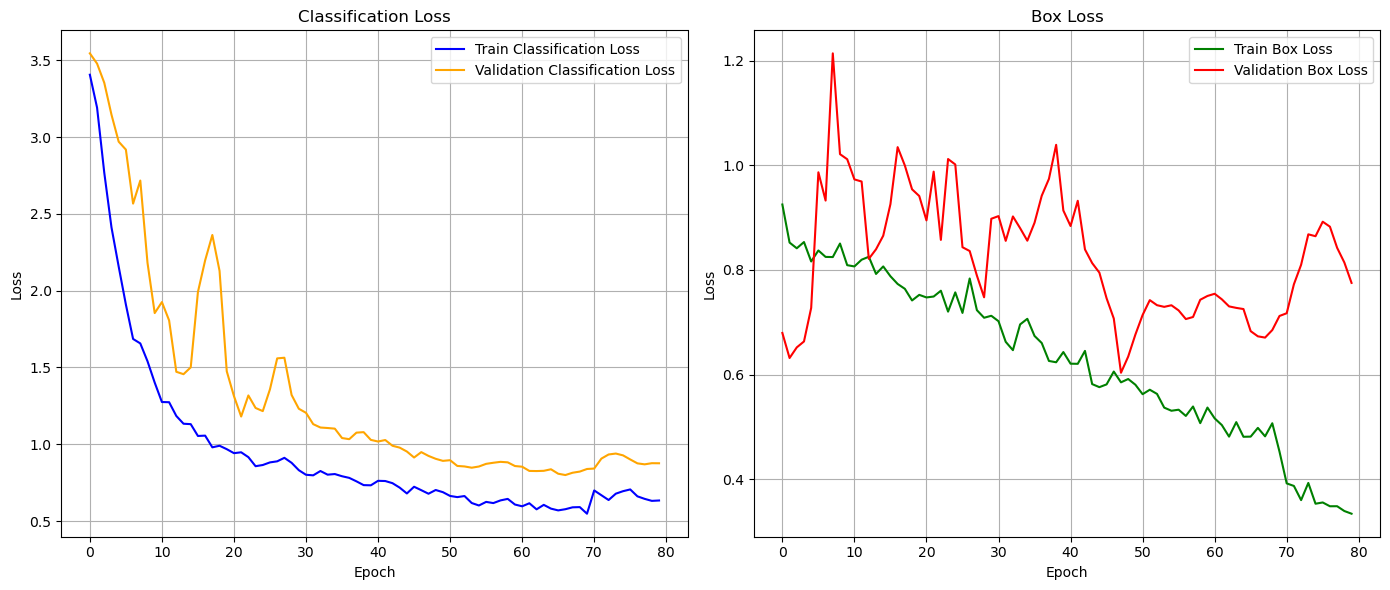

In [26]:

# Plotting the losses
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Classification Loss Plot
axs[0].plot(df['         train/cls_loss'], label='Train Classification Loss', color='blue')
axs[0].plot(df['           val/cls_loss'], label='Validation Classification Loss', color='orange')
axs[0].set_title('Classification Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Box Loss Plot
axs[1].plot(df['         train/box_loss'], label='Train Box Loss', color='green')
axs[1].plot(df['           val/box_loss'], label='Validation Box Loss', color='red')
axs[1].set_title('Box Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
